In [1]:
import numpy as np
import src.quaternion as q
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


[-883.8834765  258.8834765  625.       ]


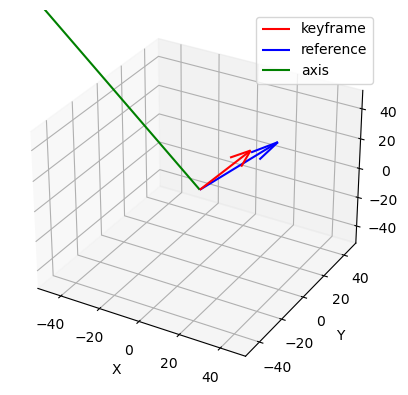

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Define the 3D vectors (origin and endpoints)
origin = np.array([0., 0., 0.])
reference = np.array([25., 25., 25.])
keyframe = np.array([25., 0., 35.35533906])
axis = np.cross(keyframe, reference)
print(axis)

# Plot the vectors
ax.quiver(*origin, *keyframe, color='r', label='keyframe')
ax.quiver(*origin, *reference, color='b', label='reference')
ax.quiver(*origin, *axis, color='g', label='axis')

# Customize the plot
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()


In [9]:
positions = np.random.randint(0, 10, (3, 3))
references = np.random.randint(0, 10, 3)

positions, references

(array([[3, 3, 8],
        [0, 9, 0],
        [0, 3, 3]]),
 array([9, 3, 0]))

In [12]:
unnormalized_axes = np.cross(positions, references)
unnormalized_axes

array([[-24,  72, -18],
       [  0,   0, -81],
       [ -9,  27, -27]])

In [16]:
norms = np.linalg.norm(unnormalized_axes, axis=-1)[None].T
norms

array([[78.        ],
       [81.        ],
       [39.23009049]])

In [17]:
unnormalized_axes / norms

array([[-0.30769231,  0.92307692, -0.23076923],
       [ 0.        ,  0.        , -1.        ],
       [-0.22941573,  0.6882472 , -0.6882472 ]])

In [18]:
positions * references

array([[27,  9,  0],
       [ 0, 27,  0],
       [ 0,  9,  0]])

In [19]:
np.sum(positions * references, axis=-1)

array([36, 27,  9])

In [21]:
np.linalg.norm(references, axis=-1)

9.486832980505138

In [20]:
(np.linalg.norm(positions, axis=-1)
                                        * np.linalg.norm(references, axis=-1))

array([85.90692638, 85.38149682, 40.24922359])

In [ ]:
np.arccos(np.sum(positions * references, axis=-1)
                                     / (np.linalg.norm(positions, axis=-1)
                                        * np.linalg.norm(references, axis=-1)))

In [7]:
unnormalized_axes = np.cross(positions, references)

q.rotation_quaternion(np.arccos(np.sum(positions * references, axis=-1)
                                     / (np.linalg.norm(positions, axis=-1)
                                        * np.linalg.norm(references, axis=-1))),
                           unnormalized_axes / np.linalg.norm(unnormalized_axes, axis=-1)[None].T)

array([[ 0.99537613,  0.07103393,  0.01777275, -0.06216654],
       [ 0.91821439,  0.29792454,  0.06607043, -0.25250348],
       [ 0.97324899,  0.06651697,  0.13522119, -0.17342758]])

In [11]:
np.cross(positions[1], references)

array([  0,   0, -81])